### CapstoneTwo : Part 2 - EDA

### Cancer Patient Data
https://www.kaggle.com/rishidamarla/cancer-patients-data?select=cancer+patient+data+sets.xlsx

In [2]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data from the csv file

data = pd.read_csv('cancer_patient_data sets.csv')
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# break them into Age Groups

data['AgeGroup'] = pd.cut(data.Age,[0, 19, 29, 39, 49, 59, 80], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,AgeGroup
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,Low,30s
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,Medium,10s
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,High,30s
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,High,30s
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,High,40s


In [5]:
# checking the age group breakdown

data['AgeGroup'].value_counts()

30s     358
20s     234
40s     207
60s+     71
10s      67
50s      63
Name: AgeGroup, dtype: int64

### Checking the Distribution of the Data

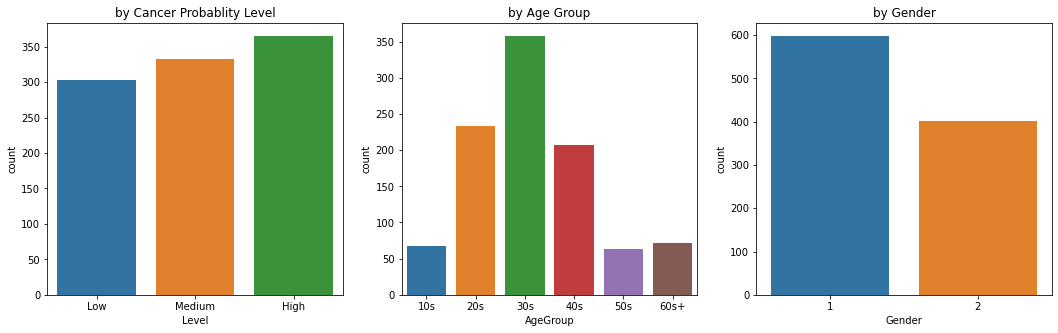

In [6]:
# Set up the matplotlib subplot figure

fig, axes = plt.subplots(1,3, figsize=(18, 5))

# Plot a simple histogram with Cancer probability level, Age Group, and Gender
sns.countplot(data=data, x="Level", ax=axes[0]).set_title('by Cancer Probablity Level')

sns.countplot(data=data, x='AgeGroup', ax=axes[1]).set_title('by Age Group')

sns.countplot(data=data, x="Gender", ax=axes[2]).set_title('by Gender')

plt.show()


####  * There is no information on which gender Gender1 and 2 are.

Since there is no information on which gender Gender 1 and 2 are respectively, I don't see the significance in leaving the data.

Alhough I find it hard to believe that there are as many people under 20 years old dying of cancer as those in the 50's or 60's, there may be some correlation.  Leaving the age as they are for now.
This data may not represent correct age distribution.
   

In [7]:
# preparing data for a heatmap

data_heat = data.drop(['AgeGroup', 'Level', 'Gender'], axis = 1)

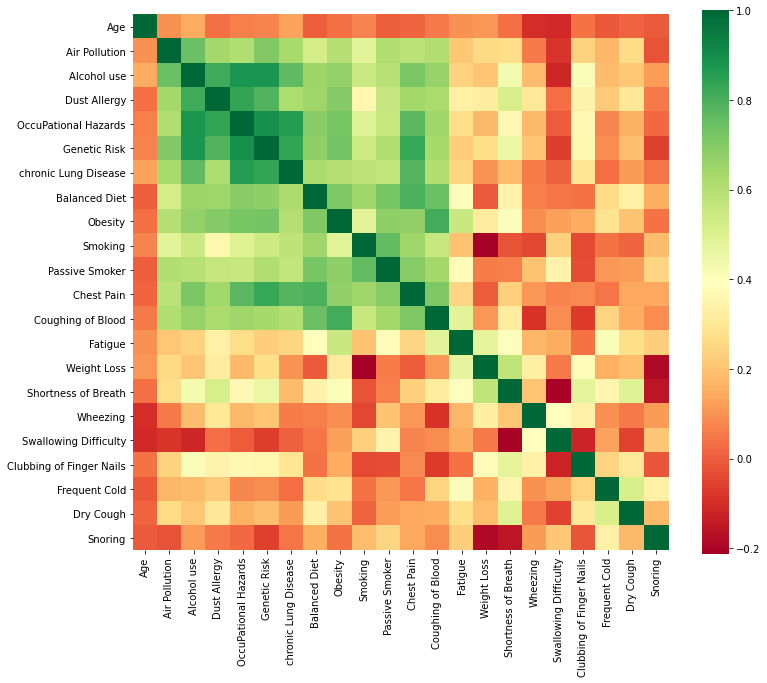

In [8]:
# plot a heatmap to show correlation among these conditions

plt.figure(figsize=(12, 10))
_= sns.heatmap(data_heat.corr(),square=True, cmap='RdYlGn')


#### More correlated conditions are life style that we can control.  The rest are more like symptoms.

In [9]:
# create a list of life style that we can control

data_lifestyle = data_heat[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', \
        'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Snoring']]

top_ls = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', \
         'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Snoring']

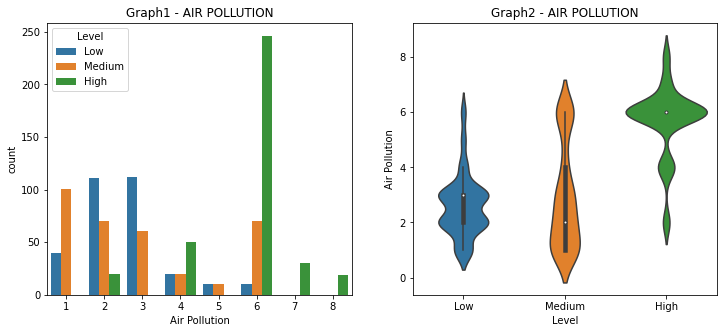

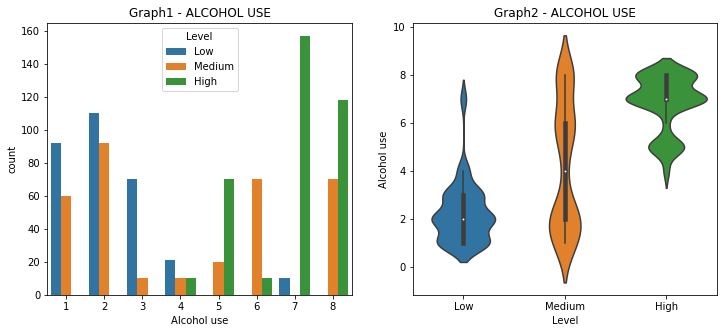

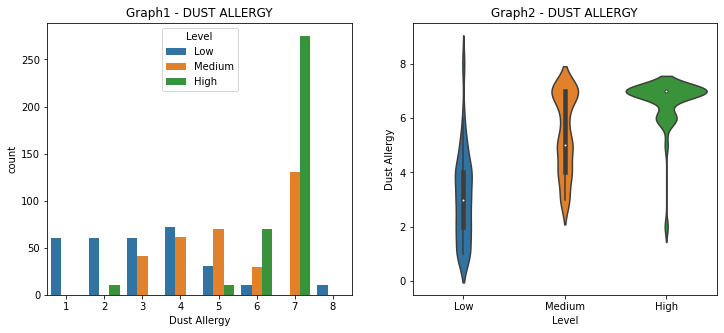

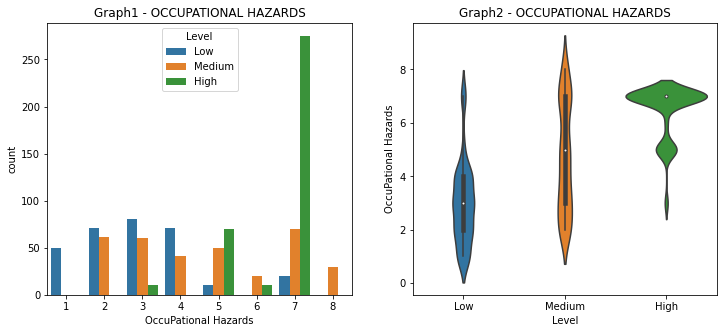

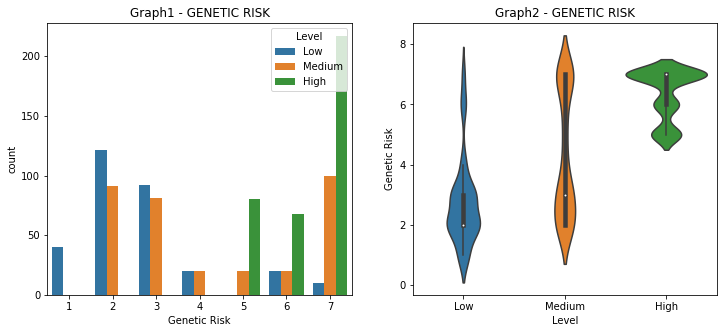

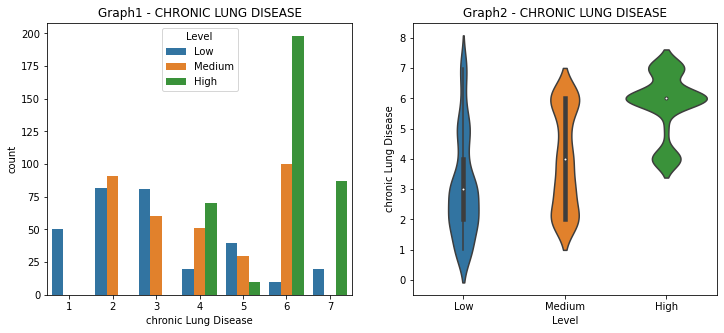

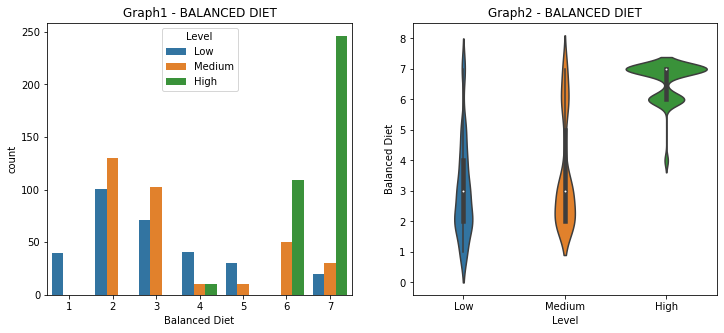

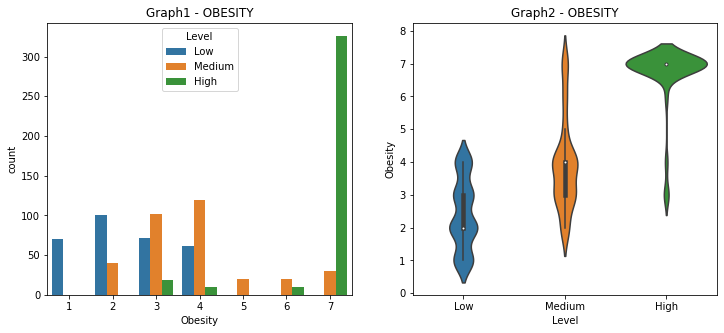

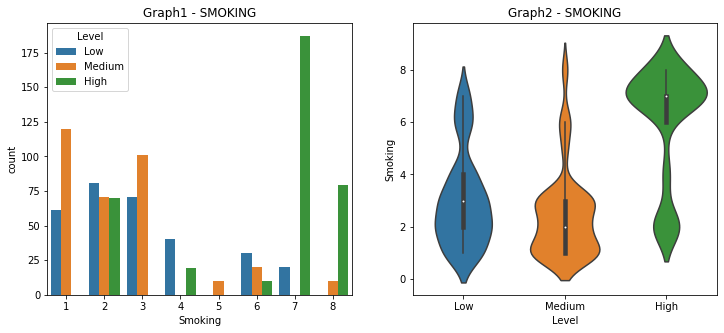

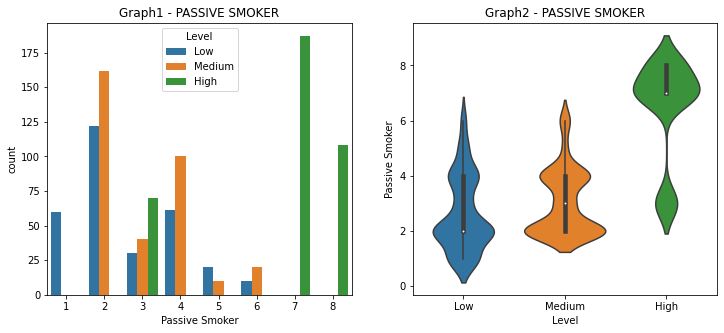

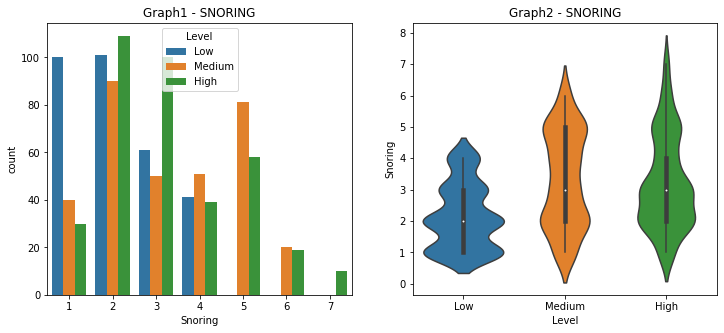

In [10]:
# plot bar and violine charts for each life style/conditions

for top in top_ls:
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    
    g1_title = "Graph1 - " + top.upper()
    g2_title = "Graph2 - " + top.upper()
    
    # Plot a simple histogram with top12 risky habit
    sns.countplot(x=top, hue='Level', data = data, ax=axes[0]).set_title(g1_title)

    # Plot a violoine plot with top12 risky habit
    sns.violinplot(x = 'Level', y = top, data=data, ax = axes[1]).set_title(g2_title)

    plt.show()

In [31]:
# extract data from those that have High probablity of getting cancer

data_high = data[data['Level'] == 'High'].drop(['Age', 'Gender', 'AgeGroup', 'Level'], axis = 1)
#data_high = data.drop(['Age', 'Gender', 'AgeGroup'], axis = 1)
data_high.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
2,4,5,6,5,5,4,6,7,2,3,...,8,8,7,9,2,1,4,6,7,2
3,7,7,7,7,6,7,7,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,6,8,7,7,7,6,7,7,8,7,...,9,3,2,4,1,4,2,4,2,3
5,4,5,6,5,5,4,6,7,2,3,...,8,8,7,9,2,1,4,6,7,2
10,6,7,7,7,7,6,7,7,7,8,...,7,5,3,2,7,8,2,4,5,3


In [32]:
# prepare and create a bar chart of life style score (mean) of those who have High probability of cancer

data_high2 = data_high.T
data_high2.head()

,2,3,4,5,10,11,13,17,18,20,...,990,991,992,993,994,995,996,997,998,999
Air Pollution,4,7,6,4,6,6,6,6,6,6,...,6,8,7,7,6,6,6,4,6,6
Alcohol use,5,7,8,5,7,8,7,7,7,8,...,5,8,7,7,7,7,8,5,8,5
Dust Allergy,6,7,7,6,7,7,7,7,7,7,...,6,7,7,7,7,7,7,6,7,6
OccuPational Hazards,5,7,7,5,7,7,7,7,7,7,...,5,7,7,7,7,7,7,5,7,5
Genetic Risk,5,6,7,5,7,7,6,6,7,6,...,5,7,7,6,7,7,7,5,7,5


In [33]:
#data_high2['Total'] = data_high2.sum(axis = 1)
data_high2['Mean'] = data_high2.mean(axis = 1)

In [34]:

data_high3 = data_high2.sort_values('Mean', ascending = False).head(20)

In [35]:
data_high3 = data_high3.reset_index()
data_high4 = data_high3.rename(columns={'index': 'Condition'})
data_high5 = data_high4[data_high4['Condition'].isin(top_ls)].sort_values('Mean', ascending = True)

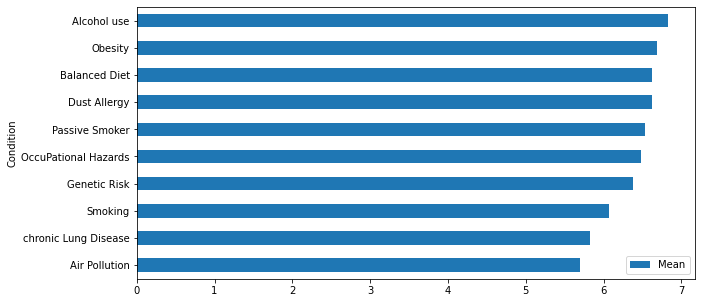

In [36]:
_ = data_high5.plot(x = 'Condition', y = 'Mean', kind = 'barh', figsize=(10, 5))

In [38]:
data1 = data[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', \
         'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Snoring', 'Level']].groupby('Level').agg('mean')
data1.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Snoring
Level,,,,,,,,,,,
High,5.693151,6.830137,6.616438,6.479452,6.375342,5.827397,6.619178,6.682192,6.073973,6.528767,3.227397
Low,2.600660,2.231023,3.112211,3.000000,2.732673,3.092409,3.000000,2.409241,3.023102,2.633663,2.141914
Medium,2.933735,4.198795,5.442771,4.716867,4.292169,3.963855,3.512048,3.903614,2.454819,3.054217,3.310241


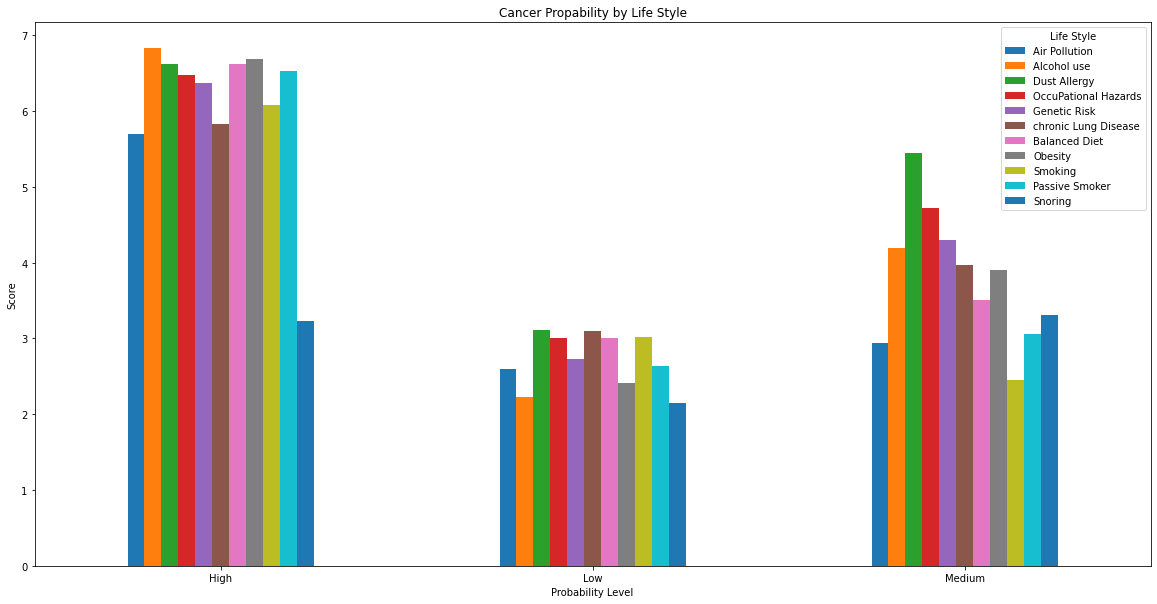

In [44]:
data1.plot(kind='bar', figsize=(20,10))
plt.legend(title="Life Style", loc = 1)
_ = plt.xlabel("Probability Level")
_ = plt.xticks(rotation = 0)
_ = plt.ylabel('Score')
_ = plt.title('Cancer Propability by Life Style')
plt.show()